# Analyzing Airbnb data for Boston and Seattle
# Data Science Nanodegree Project
# By Rakan Alkheliwi

## Business Understanding

Airbnb is the Uber of hosting where people can offer to host guests in their properties. In this notebook, we analyze Airbnb data for Boston and Seattle. We will try to get insights from this analysis and one of the things hosts care about are of course profits. I am assuming that a good review equels to profitability here.

We start by initializing libraries for our project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import confusion_matrix
%matplotlib inline

Now we go ahead and read data

In [2]:
seattle_cal = pd.read_csv("./seattle/calendar.csv")
seattle_list = pd.read_csv("./seattle/listings.csv")
seattle_rev = pd.read_csv("./seattle/reviews.csv")
boston_cal = pd.read_csv("./boston-airbnb-open-data/calendar.csv")
boston_list = pd.read_csv("./boston-airbnb-open-data/listings.csv")
boston_rev = pd.read_csv("./boston-airbnb-open-data/reviews.csv")

Data Understanding:

In this section, I will try to understand the data we have in our hand.

In [3]:
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Seattle Calender shows listing id combined with date, available, and price.

In [4]:
seattle_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


Contains 92 columns but many of them seem like description so can be deleted later. Also, we see there are common columns between calender and listing which we will use in combining the matrix.

In [5]:
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


It contains reviews by people. At first look, it seems this data has been collected in previous dataframe as it contain number of reviews. So, I will not be using reviews.

In [6]:
boston_cal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [7]:
boston_list.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [8]:
boston_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


The conclusion that we can have about our data is that reviews dataframe are not important since its value is captured in number of reviews. We have a lot of data so we will be doing a lengthy process of cleaning.

## Data Preperation

Now, we go through the lengthy process of preparing our data. We go through the following phases:

a) Merge

b) Missing Values Columms

c) Remove Uneeded Columns

c) Conversion

d) Missing Values Rows

e) Dummy variables

First thing to be done is to create one dataframe that contains all data for seattle and boston ignoring reviews. We will join dataframes of calender and listing to each other for each city. Then, we will combine cities.

### Merge

In [9]:
seattle_cal = seattle_cal.rename(columns={'listing_id': 'id'})
boston_cal = boston_cal.rename(columns={'listing_id': 'id'})
seattle=pd.merge(seattle_list,seattle_cal,on='id',how='outer')
boston=pd.merge(boston_list,boston_cal,on='id',how='outer')
seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_y
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-04,t,$85.00
1,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-05,t,$85.00
2,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-06,f,NaN
3,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-07,f,NaN
4,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,2016-01-08,f,NaN


Now create dummy columns for each city that contain name of city and then merge two dataframes together.

In [10]:
seattle['city'] = 'seattle'
boston['city'] = 'boston'
df = pd.concat([seattle,boston],ignore_index=True)

### Missing Values Columns

Identify columns with more than 75% of values missing

In [11]:
df_75 = df.columns[(df.count()/len(df)) <= .75]
df_75

Index(['access', 'cleaning_fee', 'has_availability', 'host_about',
       'house_rules', 'interaction', 'jurisdiction_names', 'license',
       'monthly_price', 'neighborhood_overview',
       'neighbourhood_group_cleansed', 'notes', 'price_y', 'security_deposit',
       'square_feet', 'transit', 'weekly_price'],
      dtype='object')

We will analyze what values are inside these columns to determine their importance

In [12]:
df['access'].value_counts()

You have access to the entire apartment, and all the fantastic amenities this building offers to its tenants.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

This cell contain values that are duplicate of another columns amneties as shown below. So I will delete it.

In [13]:
df['amenities'].value_counts()

{}                                                                                                                                                                                                                                                                                                                                                                                         28105
{TV,"Cable TV","Wireless Internet","Air Conditioning",Kitchen,Heating,Washer,Dryer,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                                                                                                                                                               5475
{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Gym,"Elevator in Building","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo

Next is cleaning fee

In [14]:
df['cleaning_fee'].value_counts()

$50.00     231775
$100.00    190895
$25.00     166075
$20.00     112055
$10.00     104025
$30.00      93440
$60.00      93440
$75.00      84315
$35.00      78475
$40.00      73365
$15.00      70445
$150.00     56575
$80.00      49640
$45.00      43800
$95.00      43070
$125.00     33215
$65.00      29200
$5.00       28470
$85.00      22995
$200.00     22630
$99.00      21900
$225.00     20075
$70.00      19710
$90.00      18250
$120.00     16060
$250.00     12775
$55.00      12410
$175.00      8030
$49.00       6570
$135.00      5475
            ...  
$76.00        365
$84.00        365
$106.00       365
$137.00       365
$37.00        365
$26.00        365
$97.00        365
$197.00       365
$158.00       365
$274.00       365
$240.00       365
$111.00       365
$66.00        365
$68.00        365
$179.00       365
$22.00        365
$56.00        365
$210.00       365
$178.00       365
$275.00       365
$27.00        365
$131.00       365
$143.00       365
$134.00       365
$117.00   

The cleaning fee has important values that are difficult to ignore. Maybe empty means zero. Let's analyze that

In [15]:
df[df['cleaning_fee']==0]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode


As you see, there are no rooms with cleaning fee equels to zero. So, it is safe to assume that empty means 0 in this case for cleaning fees. Next, I will analyze has_availability

In [16]:
df['has_availability'].value_counts()

t    1393570
Name: has_availability, dtype: int64

It seems to be same situation as before with cleaning fee; empty equels to false. Next, I analyze host_about

In [17]:
df['host_about'].value_counts()

ABOUT US:\r\n\r\nSeamlessTransition is a full-service relocation agency.  \r\n\r\nSeamlessTransition offers short-term housing options to executives, medical professionals and leisure travelers looking to secure transitional housing in major cities throughout the United States. \r\n\r\nWe match an individual's or family's short-term housing needs and preferences with available and compatible housing inventory.\r\n\r\nOur goal is to find the best short-term accommodations at the best price in the best location to meet your housing needs and preferences.  \r\n\r\nNo request is too large or too small.  It is our pleasure to serve you.\r\n\r\nWe are available Monday through Friday, 8:30 AM to 5:00 PM (EST).\r\n\r\nOur Reservation Center closes at 3PM on Friday and will not reopen until Monday morning at 9AM.\r\n\r\nWe observe all US Federal Holidays.  Kindly excuse our delay in response.\r\n                                                                                                    

I will delete this row since it is text and 75% of it is empty.

In [18]:
df['house_rules'].value_counts()

House Rules 1. Check-in is 4 pm local time. If the unit is ready earlier, we’ll let you know. Check-out is normally 11 am local time, but we’d be happy to extend it as long as we don’t have a cleaning scheduled. Just let us know.  2. All bookings require a security deposit of at least $300, which will be refunded within 7 days of your check-out. 3. For security measures we require all guests to provide proof of identification through ID verification on our own website. In order to check in we'll need a photo of your ID.  4. Our cancellation policy is as shown on our ad and defined by the site you are booking through.  5. Don’t let $300 go up in smoke. There's no smoking allowed in any Flatbook and a $300 fine for breaking this rule.  6. Unfortunately we don’t allow pets in any of our apartments. 7. Unless you’re staying in one of our specialty apartments, we don’t allow parties or excessive noise. 8. If we find the place very messy, we have to charge an extra $40 for every extra hour o

Same as about us.

In [19]:
df['interaction'].value_counts()

Need more towels? A restaurant recommendation? Our guest experience team is just a phone call or email away, 24 hours a day. Otherwise, you’ve got the place all to yourself.                                                                                                                                                                                                                                                                                                                                                                      21170
We pride ourselves in offering top of the line service to all of our guests. With our 24 hour check-in service and 24 hour customer service, you have all the control over your travel plans. Our dedicated agents are available any time to address any questions or concerns.                                                                                                                                                                                                

Also interaction will be deleted.

In [20]:
df['jurisdiction_names'].value_counts()

WASHINGTON    1393570
Name: jurisdiction_names, dtype: int64

I will delete this one as it doesn't add value. City adds more value than what state people belong to. I will then analyze license.

In [21]:
df['license'].value_counts()

Series([], Name: license, dtype: int64)

This will be deleted. Now, I will analyze monthly_price and weekly_price

In [24]:
df[df['monthly_price']==0]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode


In [25]:
df[df['weekly_price']==0]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode


weekly price and monthly price if empty means 0 or not appliable. Now, I will analyze neighborhood_overview

In [26]:
df['neighborhood_overview'].value_counts()

Conveniently bordering the neighborhoods of the South End, Back Bay and Copley Square –  Steps to public transportation, the financial district, The Copley Mall, and Newbury Street.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  7665
Wallingford is a mostly-residential neighborhood, situated between the restaurants, bars and nightlife of Fremont or Ballard, and the buzzing, academic Univ

I will delete neighborhood but I wish if there is a value that incdicate it.

In [27]:
df['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    289810
Capitol Hill           206955
Downtown               193450
Central Area           134685
Queen Anne             107675
Ballard                 83950
West Seattle            74095
Rainier Valley          58035
University District     44530
Beacon Hill             43070
Cascade                 32485
Northgate               29200
Delridge                28835
Lake City               24455
Magnolia                22265
Seward Park             16060
Interbay                 4015
Name: neighbourhood_group_cleansed, dtype: int64

In [28]:
df[df['city']=='boston']['neighbourhood_group_cleansed'].value_counts()

Series([], Name: neighbourhood_group_cleansed, dtype: int64)

In [29]:
df[df['city']=='seattle']['neighbourhood'].value_counts()

Capitol Hill                 128115
Ballard                       77745
Belltown                      74460
Minor                         70080
Queen Anne                    68255
Fremont                       54020
Wallingford                   52195
University District           39055
First Hill                    38325
Stevens                       35770
North Beacon Hill             34675
Lower Queen Anne              30295
Central Business District     29565
Greenwood                     28835
Columbia City                 22265
Ravenna                       21535
Phinney Ridge                 20440
Magnolia                      20075
Green Lake                    18980
Atlantic                      18250
North Admiral                 17520
Mount Baker                   16790
Leschi                        16060
Maple Leaf                    14965
Eastlake                      14965
Madrona                       14600
Pike Place Market             14235
The Junction                

We can delete neighborhood cleansed as we have neighborhood column filled for both seattle and boston while cleansed is not found for boston.

In [30]:
df['notes'].value_counts()

All of our rentals are fully licensed and regulated, and maintaining excellent relationships with our building managers is our top priority. We furnish all of our properties to a uniform standard, but individual units may differ slightly from the pictures shown.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

We delete this column too. 

price_y and price_x need to be compared first.

In [31]:
df.shape

(2702460, 98)

In [32]:
df['price_x'].count()

2702460

In [33]:
df['price_y'].count()

1577579

In [34]:
df[df['price_x']!=df['price_y']]['price_y'].count()

485658

As we analyze, we find that there are disparency between price in cal and list. cal has complete info while listing doesn't. So we can delete price_y.

In [35]:
df[df['security_deposit']==0]

,access,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,...,space,square_feet,state,street,summary,thumbnail_url,transit,weekly_price,xl_picture_url,zipcode


Empty deposit means 0.

In [36]:
df['square_feet'].value_counts()

1200.0    6205
800.0     3650
0.0       2920
1300.0    2190
650.0     1825
750.0     1825
1000.0    1825
500.0     1825
450.0     1460
2000.0    1460
1600.0    1095
1.0       1095
900.0     1095
850.0     1095
120.0     1095
700.0     1095
550.0     1095
200.0     1095
2.0       1095
250.0     1095
675.0      730
600.0      730
1800.0     730
420.0      730
400.0      730
1100.0     730
1150.0     730
340.0      730
1400.0     730
300.0      730
          ... 
1700.0     365
660.0      365
435.0      365
730.0      365
710.0      365
90.0       365
140.0      365
170.0      365
770.0      365
630.0      365
183.0      365
580.0      365
190.0      365
225.0      365
3.0        365
12.0       365
485.0      365
875.0      365
2750.0     365
920.0      365
925.0      365
950.0      365
2600.0     365
1050.0     365
2400.0     365
2300.0     365
2200.0     365
1850.0     365
1500.0     365
350.0      365
Name: square_feet, Length: 62, dtype: int64

Number of bedrooms is a safe indicator of space. Also as we at it, I will delete space column as it has a lot of jibrish.

In [37]:
df['transit'].value_counts()

Convenient public transportation. The locations of our properties are ideal for guests who prefer to travel without a car.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

We fill na values with zero for above columns we indicated before

In [39]:
df['weekly_price'].fillna(inplace=True,value=0)
df['monthly_price'].fillna(inplace=True,value=0)
df['security_deposit'].fillna(inplace=True,value=0)
df['cleaning_fee'].fillna(inplace=True,value=0)
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,bedrooms,...,scrape_id,security_deposit,smart_location,state,street,summary,thumbnail_url,weekly_price,xl_picture_url,zipcode
0,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,t,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
1,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,t,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
2,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,f,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,f,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
4,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",14,346,41,71,f,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119


In [40]:
df['has_availability'].fillna(inplace=True,value=False)

We check those have more than half empty

In [41]:
df_50 = df.columns[(df.count()/len(df)) <= .50]
df_50

Index([], dtype='object')

Good, we don't have columns with a lot of missing values.

### Remove Unneeded Columns

We delete columns now

In [38]:
df.drop(inplace=True,columns=['interaction','space','price_y','transit','notes','square_feet','neighbourhood_group_cleansed','neighborhood_overview','jurisdiction_names','license','house_rules','host_about','access'])

To trim more columns as we have many, I will analyze data with object types

In [42]:
str_col = df.select_dtypes('object').columns
str_col

Index(['amenities', 'available', 'bed_type', 'calendar_last_scraped',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'country', 'country_code', 'date', 'description', 'experiences_offered',
       'extra_people', 'first_review', 'has_availability',
       'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_location',
       'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_url', 'host_verifications',
       'instant_bookable', 'is_location_exact', 'last_review', 'last_scraped',
       'listing_url', 'market', 'medium_url', 'monthly_price', 'name',
       'neighbourhood', 'neighbourhood_cleansed', 'picture_url', 'price_x',
       'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license', 'room_type',
       'security_deposit', 'smart_location

In [45]:
df['bed_type'].value_counts()

Real Bed         2595515
Futon              45625
Pull-out Sofa      28470
Airbed             24455
Couch               8395
Name: bed_type, dtype: int64

bed type is categorical.

By looking at title names, I will delete: country, country_code, description, host_name, host_picture_url, host_thumbnail_url, host_url, listing_url, medium_url, name, picture_url, state, street, summary, zipcode, xl_picture_url, thumbnail_url

In [46]:
df.drop(inplace=True,columns=['country', 'country_code', 'description', 'host_name', 'host_picture_url', 'host_thumbnail_url', 'host_url', 'listing_url', 'medium_url', 'name', 'picture_url', 'state', 'street', 'summary', 'zipcode', 'xl_picture_url', 'thumbnail_url'])

In [49]:
df.drop(inplace=True,columns='calendar_last_scraped')

In [52]:
df['experiences_offered'].value_counts()

none    2702460
Name: experiences_offered, dtype: int64

experiences_offered is a silly column. We can delete it.

In [53]:
df.drop(inplace=True,columns='experiences_offered')

In [59]:
df['host_location'].value_counts()

Seattle, Washington, United States                 1189900
Boston, Massachusetts, United States                884395
US                                                  279955
New York, New York, United States                    43800
Spokane, Washington, United States                   24090
Montreal, Quebec, Canada                             21535
Middlesex County, Massachusetts, United States       18250
Cambridge, Massachusetts, United States              15695
Kent, Washington, United States                      12410
Massachusetts, United States                         10585
Brookline, Massachusetts, United States               6935
San Francisco, California, United States              6570
Somerville, Massachusetts, United States              6205
Los Angeles, California, United States                5840
Bellevue, Washington, United States                   4380
Milton, Massachusetts, United States                  3650
Medford, Massachusetts, United States                 36

In [60]:
df['host_neighbourhood'].value_counts()

Capitol Hill                 147825
Allston-Brighton             136875
Jamaica Plain                117165
Back Bay                     113880
Fenway/Kenmore               106580
Belltown                      92710
South End                     85045
Dorchester                    79570
Ballard                       76650
South Boston                  72270
Beacon Hill                   70810
Minor                         69715
Queen Anne                    68985
Fremont                       53655
Roxbury                       52195
Wallingford                   48910
North End                     45990
Central Business District     43070
East Boston                   41610
North Beacon Hill             36865
Ravenna                       36500
Mission Hill                  35040
Stevens                       31755
First Hill                    31025
West End                      29930
University District           29200
Greenwood                     29200
Lower Queen Anne            

It seems host neighborhood is varied and not indicative of value of property. So we can delete it.

In [61]:
df.drop(inplace=True,columns='host_neighbourhood')

In [67]:
df['host_response_rate'].value_counts()

100%    1622060
90%       98915
98%       81395
80%       51830
99%       47450
89%       43435
96%       43070
94%       27010
50%       26645
88%       26280
71%       25550
97%       20805
92%       20440
67%       20440
70%       17520
75%       16790
86%       14965
93%       13140
60%       12775
83%       10950
95%       10950
91%        8030
33%        7300
78%        6570
79%        6570
40%        6205
77%        6205
73%        5840
0%         4745
63%        4380
81%        3285
69%        2920
85%        2555
82%        1825
43%        1825
25%        1460
30%        1460
64%        1460
31%        1095
36%        1095
17%        1095
87%        1095
57%        1095
76%        1095
14%         730
61%         730
58%         730
56%         730
84%         730
10%         730
38%         730
68%         730
19%         365
65%         365
55%         365
53%         365
20%         365
6%          365
Name: host_response_rate, dtype: int64

In [68]:
df['host_response_time'].value_counts()

within an hour        1123105
within a few hours     797890
within a day           389090
a few days or more      29565
Name: host_response_time, dtype: int64

response rate and response time are related to each other so we can delete one of them. I elect to delete time as it categorical and not as indicative as rate.

In [69]:
df.drop(inplace=True,columns='host_response_time')

In [80]:
df['requires_license'].value_counts()

False    2702460
Name: requires_license, dtype: int64

We can go ahead and delete this variable.

In [81]:
df.drop(inplace=True,columns='requires_license')

In [83]:
df['smart_location'].value_counts()

Seattle, WA                      1390650
Boston, MA                       1234430
Roxbury Crossing, MA                8760
Somerville, MA                      6935
Jamaica Plain, MA                   6570
Brookline, MA                       6570
Cambridge, MA                       5840
Brighton, MA                        5475
Charlestown, MA                     5475
Dorchester, MA                      5475
Allston, MA                         4380
Roslindale, MA                      2190
West Roxbury, MA                    1825
ROXBURY CROSSING, MA                1460
Mattapan, MA                        1095
East Boston, MA                     1095
ALLSTON, MA                          730
Seattle , WA                         730
MA                                   730
Boston, Massachusetts, US, MA        730
Jamaica Plain, Boston, MA            730
South Boston, MA                     730
Jamaica Plain , MA                   730
West Seattle, WA                     730
Hyde Park, MA   

In [84]:
df.drop(inplace=True,columns='smart_location')

In [73]:
df['market'].value_counts()

Seattle                  1393570
Boston                   1302685
Other (International)        365
Other (Domestic)             365
San Francisco                365
Name: market, dtype: int64

We will delete market and last scraped as we going to use city instead.

In [72]:
df.drop(inplace=True,columns='last_scraped')

In [74]:
df.drop(inplace=True,columns='market')

In [75]:
df['neighbourhood_cleansed'].value_counts()

Broadway                     144905
Jamaica Plain                125195
South End                    118990
Back Bay                     110230
Fenway                       105850
Dorchester                    98185
Allston                       94900
Belltown                      85410
Brighton                      72270
Beacon Hill                   70810
South Boston                  63510
Downtown                      63145
Wallingford                   60955
Fremont                       57670
East Boston                   54750
Roxbury                       52560
North End                     52195
Minor                         49275
Mission Hill                  45260
University District           44530
Stevens                       43435
Charlestown                   40515
First Hill                    39420
Central Business District     37595
Lower Queen Anne              34310
Greenwood                     32485
South Boston Waterfront       30295
East Queen Anne             

We go with neighborhood cleansed instead of regular one

In [76]:
df.drop(inplace=True,columns='neighbourhood')

What do these review values stand for? Read below post:

https://www.airbnb.com/help/article/1257/how-do-star-ratings-work

As you see, these values are input from users. Airbnb take those values and turn them into a rating value. We will delete all of these values except rating as we want to determine rating without getting noise from user input.

In [173]:
df['review'] = df['review_scores_rating']

In [174]:
df = df[df.columns.drop(list(df.filter(regex='review_scores')))]

In [155]:
df.drop(inplace=True,columns='host_listings_count')

In [178]:
df.drop(inplace=True,columns='host_id')

### Conversion

Amneties will be converted to a numerical column that indicates number of amneties. We will develop a function that takes number of strings inside the list of each row to a number. A similar column is host_verifications which shows number of channels verified for the host, we will use same function to convert it.

In [43]:
def count_list(x):
    return x.count(',')+1
df['amenities'] = df['amenities'].apply(lambda x: count_list(x))
df['host_verifications'] = df['host_verifications'].apply(lambda x: count_list(x))


As you saw before in has availability column, true and false values are represented with charecters t and f. We will convert those values to binary values for all columns.

In [44]:
df.replace(inplace=True,to_replace='t',value=True)
df.replace(inplace=True,to_replace='f',value=False)
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bed_type,bedrooms,...,scrape_id,security_deposit,smart_location,state,street,summary,thumbnail_url,weekly_price,xl_picture_url,zipcode
0,4,10,14,346,41,71,True,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
1,4,10,14,346,41,71,True,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
2,4,10,14,346,41,71,False,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
3,4,10,14,346,41,71,False,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119
4,4,10,14,346,41,71,False,1.0,Real Bed,1.0,...,20160104002432,0,"Seattle, WA",WA,"Gilman Dr W, Seattle, WA 98119, United States",NaN,NaN,0,NaN,98119


Now, we will continue analyzing the object columns that we have

In [48]:
df['calendar_updated'].value_counts()

today            561735
2 weeks ago      238710
a week ago       214985
3 weeks ago      190165
2 months ago     162790
yesterday        147825
4 weeks ago      135415
3 months ago     127385
4 days ago       114245
5 weeks ago      103660
5 days ago        96360
3 days ago        95995
4 months ago      79570
6 weeks ago       72635
2 days ago        70810
5 months ago      53655
7 weeks ago       36500
7 months ago      24090
6 days ago        23360
1 week ago        22630
6 months ago      22265
8 months ago      16790
10 months ago     16425
never             15695
9 months ago      15330
11 months ago      8030
13 months ago      7665
14 months ago      7300
12 months ago      6570
17 months ago      3650
15 months ago      3285
16 months ago      2920
22 months ago      1095
18 months ago       730
30 months ago       730
25 months ago       730
23 months ago       365
20 months ago       365
Name: calendar_updated, dtype: int64

We could convert these values to number of weeks. We will delete last scraped value as it not related to our analysis

In [50]:
def convert_relative_numerical(x):
    if('a week' in x):
        return 1
    elif('week' in x):
        return str.split(x)[0]
    elif ('month' in x):
        return int(str.split(x)[0])*4
    elif ('never' in x):
        return int(0)
    else:
        return int(1)
df['calendar_updated']=df['calendar_updated'].apply(lambda x:convert_relative_numerical(x))



In [51]:
df['cancellation_policy'].value_counts()

strict             1094635
moderate            792415
flexible            784385
super_strict_30      31025
Name: cancellation_policy, dtype: int64

cancellation_policy is categorical variable

In [54]:
df['extra_people'].value_counts()

$0.00      1554900
$25.00      218635
$10.00      206955
$20.00      198925
$15.00      162425
$50.00       94170
$30.00       59860
$5.00        31025
$35.00       30295
$40.00       29565
$100.00      17885
$45.00       10585
$75.00        8395
$12.00        5840
$7.00         5840
$60.00        5110
$8.00         4380
$17.00        4380
$29.00        4015
$19.00        3285
$49.00        3285
$18.00        2920
$39.00        2555
$70.00        2555
$9.00         2555
$24.00        2190
$80.00        2190
$200.00       1825
$22.00        1825
$6.00         1825
            ...   
$150.00       1460
$14.00        1460
$28.00        1095
$27.00        1095
$36.00        1095
$65.00        1095
$16.00        1095
$33.00         730
$300.00        730
$34.00         730
$44.00         730
$85.00         730
$59.00         730
$21.00         365
$68.00         365
$125.00        365
$13.00         365
$48.00         365
$42.00         365
$62.00         365
$88.00         365
$77.00      

This is a great column. We keep it.

In [55]:
df['host_acceptance_rate'].value_counts()

100%    1552710
55%       50735
91%       41975
94%       41245
98%       35405
67%       32485
68%       32485
45%       29200
99%       27375
95%       25550
93%       24455
96%       20440
81%       19710
0%        18250
50%       17520
83%       16425
89%       15330
97%       14235
33%       13140
92%       12410
88%       12410
56%       12045
75%       11315
90%       11315
36%        9855
86%        9855
69%        9125
82%        8760
80%        8760
71%        7665
         ...   
79%        3650
74%        2920
25%        2920
65%        2555
58%        2190
42%        2190
46%        2190
64%        1825
72%        1825
19%        1825
61%        1825
20%        1460
30%        1095
40%        1095
29%        1095
62%        1095
43%         730
38%         730
54%         730
17%         730
59%         365
51%         365
47%         365
28%         365
18%         365
53%         365
48%         365
44%         365
52%         365
23%         365
Name: host_acceptance_ra

In [56]:
df['host_has_profile_pic'].value_counts()

True     2696255
False       5475
Name: host_has_profile_pic, dtype: int64

In [57]:
df['host_identity_verified'].value_counts()

True     2044365
False     657365
Name: host_identity_verified, dtype: int64

In [58]:
df['host_is_superhost'].value_counts()

False    2269205
True      432525
Name: host_is_superhost, dtype: int64

In [62]:
df.to_pickle('./semi_clean_data.pkl')

Regarding host location it is varied. But it would be great to see if host if found at same location as his property.

In [63]:
df['host_location']=df['host_location'].fillna("NA")
df['same_location'] = df.apply(lambda x: x['city'] in x['host_location'].lower(), axis=1)

In [64]:
df['same_location'].value_counts()

True     2087435
False     615025
Name: same_location, dtype: int64

In [65]:
df.drop(inplace=True,columns='host_location')

In [70]:
df['instant_bookable'].value_counts()

False    2269935
True      432525
Name: instant_bookable, dtype: int64

In [71]:
df['is_location_exact'].value_counts()

True     2369945
False     332515
Name: is_location_exact, dtype: int64

In [77]:
df['property_type'].value_counts()

Apartment          1577165
House               837675
Condominium         117530
Townhouse            62780
Loft                 28835
Bed & Breakfast      28470
Other                14235
Cabin                 7665
Boat                  7300
Camper/RV             5110
Bungalow              4745
Villa                 2190
Tent                  1825
Entire Floor          1460
Dorm                  1460
Treehouse             1095
Chalet                 730
Guesthouse             365
Yurt                   365
Name: property_type, dtype: int64

property type is categorical

In [78]:
df['require_guest_phone_verification'].value_counts()

False    2479080
True      223380
Name: require_guest_phone_verification, dtype: int64

In [79]:
df['require_guest_profile_picture'].value_counts()

False    2560840
True      141620
Name: require_guest_profile_picture, dtype: int64

In [82]:
df['room_type'].value_counts()

Entire home/apt    1704185
Private room        926370
Shared room          71905
Name: room_type, dtype: int64

Categorical and important

Now, let's take columns we know are not object and convert them

In [85]:
str_col = df.select_dtypes('object').columns
str_col

Index(['bed_type', 'calendar_updated', 'cancellation_policy', 'city',
       'cleaning_fee', 'date', 'extra_people', 'first_review',
       'host_acceptance_rate', 'host_has_profile_pic',
       'host_identity_verified', 'host_is_superhost', 'host_response_rate',
       'host_since', 'last_review', 'monthly_price', 'neighbourhood_cleansed',
       'price_x', 'property_type', 'room_type', 'security_deposit',
       'weekly_price'],
      dtype='object')

We convert following to int: cleaning fee, extra people, monthly price, price_x, security_deposit, weekly price and not forget to change name of price_x to price.
We convert the following to boolean: host_has_profile_pic,host_identity_verified,host_is_superhost
And to float, we convert: host_response_rate.
We already filled missing values so we can go ahead and convert. Datetime need some analysis.

In [86]:
df['price']=df['price_x']
df.drop(inplace=True,columns='price_x')

In [87]:
df.to_pickle('./clean_data.pkl')

In [88]:
df['cleaning_fee']=df['cleaning_fee'].replace('[$,]','',regex=True).astype(float).astype(int)
df['extra_people']=df['extra_people'].replace('[$,]','',regex=True).astype(float).astype(int)
df['monthly_price']=df['monthly_price'].replace('[$,]','',regex=True).astype(float).astype(int)
df['weekly_price']=df['weekly_price'].replace('[$,]','',regex=True).astype(float).astype(int)
df['price']=df['price'].replace('[$,]','',regex=True).astype(float).astype(int)
df['security_deposit']=df['security_deposit'].replace('[$,]','',regex=True).astype(float).astype(int)

In [89]:
df['host_has_profile_pic'].astype(bool)
df['host_identity_verified'].astype(bool)
df['host_is_superhost'].astype(bool)

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
2702430    False
2702431    False
2702432    False
2702433    False
2702434    False
2702435    False
2702436    False
2702437    False
2702438    False
2702439    False
2702440    False
2702441    False
2702442    False
2702443    False
2702444    False
2702445    False
2702446    False
2702447    False
2702448    False
2702449    False
2702450    False
2702451    False
2702452    False
2702453    False
2702454    False
2702455    False
2702456    False
2702457    Fal

In [90]:
df['host_acceptance_rate']=df['host_acceptance_rate'].replace('[%]','',regex=True).astype(float)/100
df['host_acceptance_rate']

0          1.00
1          1.00
2          1.00
3          1.00
4          1.00
5          1.00
6          1.00
7          1.00
8          1.00
9          1.00
10         1.00
11         1.00
12         1.00
13         1.00
14         1.00
15         1.00
16         1.00
17         1.00
18         1.00
19         1.00
20         1.00
21         1.00
22         1.00
23         1.00
24         1.00
25         1.00
26         1.00
27         1.00
28         1.00
29         1.00
           ... 
2702430    0.95
2702431    0.95
2702432    0.95
2702433    0.95
2702434    0.95
2702435    0.95
2702436    0.95
2702437    0.95
2702438    0.95
2702439    0.95
2702440    0.95
2702441    0.95
2702442    0.95
2702443    0.95
2702444    0.95
2702445    0.95
2702446    0.95
2702447    0.95
2702448    0.95
2702449    0.95
2702450    0.95
2702451    0.95
2702452    0.95
2702453    0.95
2702454    0.95
2702455    0.95
2702456    0.95
2702457    0.95
2702458    0.95
2702459    0.95
Name: host_acceptance_ra

### Missing Values Rows

Now, we work with missing values in rows

In [91]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['bathrooms', 'bedrooms', 'beds', 'first_review', 'host_acceptance_rate',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_response_rate', 'host_since',
       'host_total_listings_count', 'last_review', 'property_type',
       'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'reviews_per_month'],
      dtype='object')

In [98]:
df['review_scores_rating'].fillna(inplace=True,value=0)

In [100]:
df['reviews_per_month'].fillna(inplace=True,value=0)

We need to answer the question, how many rows we have that contain missing values.

In [102]:
df.isnull().any(axis=1).sum()/df.shape[0]

0.2922744462452728

So, the problem is that 30% of our rows contain missing values. So, we can't just delete them.

In [103]:
df['property_type'].count()/len(df['property_type'])

0.9994597514856834

99% of data with in bathrooms, beds, bedrooms, profile pic, verification do not have missing values. Before confirming deletion, we will see how many rows we dropped if it is a low number we go ahead with it.

In [104]:
df['host_total_listings_count'].count()/len(df['host_total_listings_count'])

0.9997298757428417

In [105]:
df['host_since'].count()/len(df['host_since'])

0.9997298757428417

In [106]:
df['host_listings_count'].count()/len(df['host_listings_count'])

0.9997298757428417

In [107]:
df['host_is_superhost'].count()/len(df['host_is_superhost'])

0.9997298757428417

In [108]:
df['host_identity_verified'].count()/len(df['host_identity_verified'])

0.9997298757428417

In [109]:
df['host_has_profile_pic'].count()/len(df['host_has_profile_pic'])

0.9997298757428417

In [110]:
df.to_pickle('./clean_data.pkl')

In [111]:
df.dropna(inplace=True,subset=['host_has_profile_pic','host_identity_verified','host_is_superhost','host_listings_count','host_since','host_total_listings_count','property_type','bathrooms','bedrooms','beds'])

In [112]:
df.shape[0]

2682020

As you see, this is almost 0% of data. So, we will continue. But we need to handle missing values in other columns.

In [113]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index(['first_review', 'host_acceptance_rate', 'host_response_rate',
       'last_review'],
      dtype='object')

In [114]:
df['last_review'].value_counts()

2016-09-05    42705
2016-09-01    38690
2016-01-02    35040
2016-08-28    34310
2015-11-29    34310
2015-12-01    33945
2016-01-01    32485
2016-08-29    28470
2015-12-30    28470
2015-12-29    28105
2016-08-21    27740
2015-12-20    27375
2016-08-22    27375
2016-09-04    26645
2016-09-02    24455
2016-09-06    23360
2016-08-31    22995
2015-12-28    22630
2015-12-31    21170
2015-12-21    20805
2016-09-03    19345
2015-12-14    19345
2016-08-30    18980
2015-12-27    18980
2016-08-19    18615
2015-12-22    18615
2015-10-19    17520
2016-08-20    17520
2016-08-08    17155
2016-08-12    17155
              ...  
2016-04-07      365
2013-09-01      365
2014-11-27      365
2015-07-22      365
2015-03-19      365
2016-06-03      365
2015-04-20      365
2016-05-11      365
2016-02-29      365
2014-10-09      365
2012-03-04      365
2016-03-20      365
2013-09-16      365
2014-05-20      365
2013-07-02      365
2012-05-25      365
2016-04-12      365
2015-07-10      365
2015-06-30      365


In [115]:
df.drop(inplace=True,columns='id')

We can delete longitude and latitude as it too specific and we want to focus on neighborhood rather than exact location.

In [116]:
df.drop(inplace=True,columns=['latitude','longitude'])

In [117]:
df.drop(inplace=True,columns='scrape_id')

In [119]:
len(df.groupby('host_id')['host_acceptance_rate'].count()==0)

4912

We can see that host acceptance rate is not fully empty. If we group by host id, we see there are only around 5000 datapoints with no host acceptance rate. Moreover, we could just get average acceptance rate rather than having variations in value.

In [120]:
df.to_pickle('./clean_data.pkl')

In [121]:
df['host_avg_acceptance_rate']=df.groupby('host_id')['host_acceptance_rate'].transform('mean')
df['host_avg_acceptance_rate'].value_counts()

1.000000    1527525
0.556522      50370
0.450000      25185
0.750000      23360
0.680000      22265
0.980000      20805
0.000000      18250
0.910000      18250
0.500000      17520
0.670000      16425
0.830000      11315
0.750000      11315
0.930000       8760
0.810000       8760
0.860000       8030
0.960000       8030
0.680000       8030
0.940000       8030
0.880000       7665
0.910000       7300
0.940000       7300
0.920000       7300
0.930000       7300
0.910000       6935
0.660000       6935
0.950000       6570
0.800000       6205
0.810000       6205
0.940000       5840
0.330000       5840
             ...   
0.600000        730
0.430000        730
0.840000        730
0.360000        730
0.790000        730
0.170000        730
0.720000        730
0.380000        730
0.330000        730
0.200000        730
0.420000        730
0.660000        730
0.760000        730
0.990000        730
0.460000        730
0.200000        730
0.650000        365
0.530000        365
0.480000        365


In [122]:
df['host_avg_acceptance_rate'].count()

2230880

In [123]:
df.shape

(2682020, 56)

The problem with acceptance rate is that 40,000 values are nan. 

In [124]:
df['host_avg_acceptance_rate'].count()/len(df['host_avg_acceptance_rate'])

0.8317909635274905

We have a lot of values missing in acceptance rate still. We need to make a sacrifice. Since, we have too many columns we can trim this column instead of deleting rows.

In [125]:
df.drop(inplace=True,columns=['host_acceptance_rate','host_avg_acceptance_rate'])

In [126]:
df.shape

(2682020, 54)

We will try to get average response rate and hope we have a low number of missing values.

In [127]:
df['host_response_rate']=df['host_response_rate'].replace('[%]','',regex=True)
df['host_response_rate']=df['host_response_rate'].astype(float)
df['host_avg_response_rate']=df.groupby('host_id')['host_response_rate'].transform('mean')


In [128]:
df['host_avg_response_rate'].count()/len(df['host_avg_response_rate'])

0.8656777354382145

Samewhise, we cannot delete rows for a column when we have many columns. I will delete columns related to response rate.

In [130]:
df.drop(inplace=True,columns=['host_response_rate','host_avg_response_rate'])

In [131]:
df.shape

(2682020, 54)

To convert first review and last review to something more meaningful, we could substact them from each other and this may fix missing value issue. And as we at it, let's convert some objects to datetime

In [133]:
str_col = df.select_dtypes('object').columns
str_col

Index(['bed_type', 'calendar_updated', 'cancellation_policy', 'city', 'date',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_is_superhost', 'host_since', 'last_review',
       'neighbourhood_cleansed', 'property_type', 'room_type'],
      dtype='object')

Since, we are subtracting last review froom first review, let's fill missing values with zero

In [134]:
df['first_review'].fillna(inplace=True,value=0)
df['last_review'].fillna(inplace=True,value=0)

In [135]:
df['first_review']=pd.to_datetime(df['first_review'],errors='ignore')
df['date']=pd.to_datetime(df['date'],errors='ignore')
df['last_review']=pd.to_datetime(df['last_review'],errors='ignore')

In [138]:
df['review_diff'] = df['last_review'].sub(df['first_review'],fill_value=0).dt.days
df['review_diff'].value_counts()

0       750805
35       10585
6        10220
16        9855
7         9125
8         9125
29        8760
11        8760
21        8760
19        7665
3         7665
31        7665
30        7665
14        7665
65        7665
49        7665
50        7300
52        7300
131       7300
28        7300
63        7300
46        6935
83        6935
9         6935
5         6935
98        6935
32        6935
41        6935
55        6570
13        6570
         ...  
912        365
968        365
970        365
971        365
1009       365
1031       365
1030       365
299        365
1029       365
1025       365
1023       365
303        365
1021       365
2353       365
2355       365
1011       365
1008       365
972        365
1007       365
1006       365
1000       365
996        365
994        365
316        365
990        365
987        365
986        365
981        365
973        365
2044       365
Name: review_diff, Length: 1273, dtype: int64

Now, we delete first review and last review.

In [139]:
df.drop(inplace=True,columns=['last_review','first_review'])

In [140]:
df['review_diff'].count()/len(df['review_diff'])

1.0

In [143]:
df_miss = df.columns[(df.count()/len(df)) < 1]
df_miss

Index([], dtype='object')

So, we got rid of missing data. Now, we need to continue cleaning object data.

In [144]:
str_col = df.select_dtypes('object').columns
str_col

Index(['bed_type', 'calendar_updated', 'cancellation_policy', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_since', 'neighbourhood_cleansed', 'property_type', 'room_type'],
      dtype='object')

In [145]:
df['host_is_superhost']=df['host_is_superhost'].astype(bool)
df['host_has_profile_pic']=df['host_has_profile_pic'].astype(bool)
df['host_identity_verified']=df['host_identity_verified'].astype(bool)
df['host_is_superhost']=df['host_is_superhost'].astype(bool)


In [146]:
df['host_since']=pd.to_datetime(df['host_since'],errors='ignore')


In [147]:
df['host_diff'] = df['date'].sub(df['host_since'],fill_value=0).dt.days
df['host_diff']
df.drop(inplace=True,columns=['date','host_since'])

amneties and host verifications are lists and can be converted to int that represent how many elements inside of list.

In [148]:
df['calendar_updated']=df['calendar_updated'].astype(int)

We converted what we converted from object to int, bool and float. Now, time to correct float columns.

In [150]:
float_col = df.select_dtypes('float').columns
float_col

Index(['bathrooms', 'bedrooms', 'beds', 'host_listings_count',
       'host_total_listings_count', 'review_scores_accuracy',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_rating', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [151]:
df['bedrooms']=df['bedrooms'].astype(int)

In [152]:
df['beds']=df['beds'].astype(int)

In [153]:
df['host_listings_count']=df['host_listings_count'].astype(int)

In [154]:
df['host_total_listings_count']=df['host_total_listings_count'].astype(int)

We need to delete host listings count as it similar to host listings count.

In [161]:
df['review_scores_rating']=df['review_scores_rating'].astype(int)

In [163]:
df.to_pickle('./clean_data.pkl')

Time to create values out of categorical variables

### Dummy Variables

In [176]:
df =pd.get_dummies(df,columns=['bed_type', 'cancellation_policy', 'neighbourhood_cleansed',
       'property_type', 'room_type','city'],drop_first=True)
df.head()

,accommodates,amenities,availability_30,availability_365,availability_60,availability_90,available,bathrooms,bedrooms,beds,...,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Villa,property_type_Yurt,room_type_Private room,room_type_Shared room,city_seattle
0,4,10,14,346,41,71,True,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,4,10,14,346,41,71,True,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
2,4,10,14,346,41,71,False,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,4,10,14,346,41,71,False,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,4,10,14,346,41,71,False,1.0,1,1,...,0,0,0,0,0,0,0,0,0,1


In [181]:
df.shape

(2682020, 175)

## Modeling

We now have data that is cleaned and not missing values. But let's break our modeling to different phases:

a) EDA

b) Base Model

c) Feature Selection

d) Improved model

### EDA

Below code copied from:
https://seaborn.pydata.org/examples/many_pairwise_correlations.html

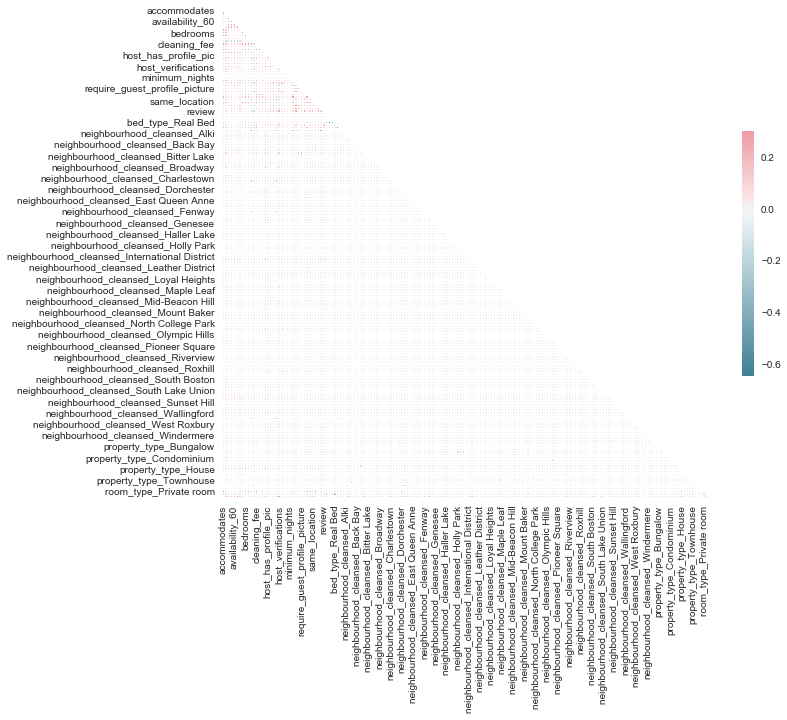

In [180]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It is difficult to see the heatmap due to the many variables we have. One thing we could do is identifying pairs with strong correlation to remove variables explained by others.

In [182]:
df_corr = df.corr().abs()

In [194]:
strong_pairs = (df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
                 .stack().sort_values())


In [196]:
strong_pairs.tail(20)

accommodates                      guests_included                  0.521245
cancellation_policy_moderate      cancellation_policy_strict       0.532284
bathrooms                         bedrooms                         0.538600
monthly_price                     weekly_price                     0.557422
number_of_reviews                 reviews_per_month                0.577832
availability_365                  availability_60                  0.592420
number_of_reviews                 review_diff                      0.631230
bed_type_Futon                    bed_type_Real Bed                0.646672
availability_365                  availability_90                  0.647057
host_identity_verified            host_verifications               0.691498
bedrooms                          beds                             0.735767
require_guest_phone_verification  require_guest_profile_picture    0.749359
accommodates                      bedrooms                         0.751695
availability

If we analyze columns with correlation more than 50% we see they are related:

accomedates is similar to guests included

availability columns are similar

host identity verified are similar to host verifications. We can drop host verifications as we trust verified more than a number of verifications.

bedrooms correlate with beds. We should keep bedrooms and remove accomedates, guests included, bathrooms

cancelation policy strict and moderate correlate

bathrooms and bedrooms are similar. The more bedrooms you have, the more bathrooms.

Monthly price should correlate with weekly price. So let's drop one of them.

Has availability strongly correlate with city. Because has vailability is mostly true. We should have deleted it when we got the chance as by default we score values for available rooms. Also, available will be dropped.

Number of reviews, reviews diff, and reviews per month are kind of similar. We can keep one which is Number of reviews as it more general than reviews per month.

I will not drop the following columns even though they correlate:

cancelation policy because they are different even though they correlate

bed type futon is different than real bed so keep it

In [199]:
df.drop(inplace=True,columns=['available','availability_30','availability_90','availability_60','availability_365','accommodates','guests_included','bathrooms','monthly_price','reviews_per_month','review_diff','host_verifications','beds','require_guest_profile_picture','calculated_host_listings_count','has_availability'])


Let's rerun our correlation matrix

In [200]:
df_corr = df.corr().abs()
strong_pairs = (df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
                 .stack().sort_values())
strong_pairs.tail(20)

bed_type_Real Bed                 room_type_Shared room                  0.264660
host_is_superhost                 number_of_reviews                      0.267245
host_diff                         cancellation_policy_super_strict_30    0.269638
bed_type_Couch                    bed_type_Real Bed                      0.275453
number_of_reviews                 review                                 0.278853
require_guest_phone_verification  cancellation_policy_super_strict_30    0.311750
property_type_House               city_seattle                           0.321801
cleaning_fee                      cancellation_policy_strict             0.350964
require_guest_phone_verification  host_diff                              0.361472
cleaning_fee                      security_deposit                       0.365876
price                             room_type_Private room                 0.371375
cleaning_fee                      price                                  0.392662
host_total_listi

Re-run heatmap

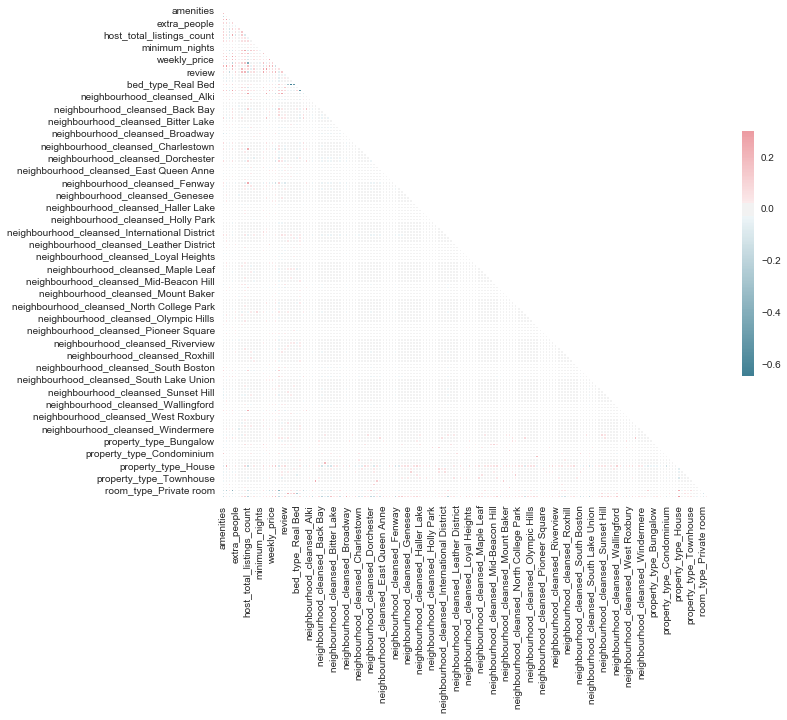

In [203]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The heatmap is entirely white which is a great indicator that we got rid of strongly correlated variables.

Time to answer questions:
1. Can we come up with a model that can predict good reviews?
2. What are the most important 10 features in determining reviews?
3. Can we generalize our model to any city or are models specific to cities? That we have to do our analysis to each of Seattle and Boston and compare them with our answers in 1 and 2.

### Base Model: Linear Regression

We will need category of city but not now. We want a general model for both Seattle and Boston and then see if we can apply this model on any city.

In [204]:
X = df.drop(columns=['review','city_seattle'])
Y = df['review']

We split our data into training and testing data.

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)

We develop our linear regression model and print its r2 score.

In [206]:
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train)
y_preds = lm_model.predict(X_test)
r2_base =  r2_score(y_test,y_preds)
print(r2_base)

0.22807210347333173


So the score of our model is 23% which is horrible. Let's try to find a model that can predict trying my best to get above 50% or beat base model.

### Feature Selection

We use chi2 to select the best 10 features to predict our review score.

In [207]:
selector = SelectKBest(chi2, k=10)
selector.fit(X,Y)
X_new = selector.transform(X)
print(X_new.shape)

X.columns[selector.get_support(indices=True)]

vector_names = list(X.columns[selector.get_support(indices=True)])
print(vector_names)


(2682020, 10)
['calendar_updated', 'extra_people', 'host_total_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'security_deposit', 'weekly_price', 'price', 'host_diff']


We use these top columns to run our model. We want a better model than lm. So, I will be using decision tree regressor.

In [208]:
X=df[vector_names]

In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)

In [210]:
dtr = tree.DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_train)
y_preds=dtr.predict(X_test)

In [214]:
r2_dtr =  r2_score(y_test,y_preds)
print(r2_dtr)

0.9970718178080102


Great result using Decission tree regressor!!! This answers first and second question. But out of curiosity let's do decision tree regressor without the features selected.

In [215]:
X = df.drop(columns=['review','city_seattle'])
Y = df['review']
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)
dtr = tree.DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_train)
y_preds=dtr.predict(X_test)
r2_dtr =  r2_score(y_test,y_preds)
print(r2_dtr)

0.999018393377853


So, it seems that decision tree regressor is a natural fit for Airbnb data and that feature selection was irrelavant. But there is a catch.

I used the code from the link below:

https://www.kaggle.com/grfiv4/plotting-feature-importances

In [227]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
        
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

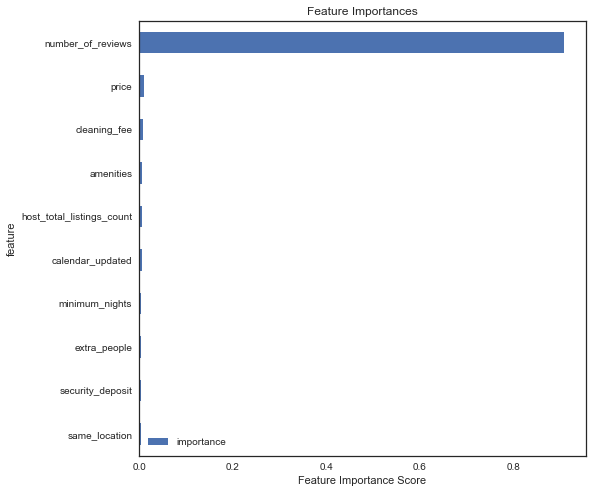

,importance
feature,
same_location,0.002986
security_deposit,0.003177
extra_people,0.003574
minimum_nights,0.004101
calendar_updated,0.005508
host_total_listings_count,0.005743
amenities,0.006622
cleaning_fee,0.008206
price,0.010895


In [228]:
plot_feature_importances(dtr,X,Y)

So above are the most important features. I was jumping to that question when I realized something.

Let's rethink it. Is not it desirable to have a big number of reviews with a good review. It seems that we forgot to drop that column which is also a dependent variable. So, Let's redo our calculations dropping number of reviews. First, let's save our data.

#### Q1. What is the best model to predict reviews for Airbnb data?

In [229]:
df.to_pickle('./clean_data.pkl')

In [230]:
df.drop(inplace=True,columns='number_of_reviews')

In [231]:
X = df.drop(columns=['review','city_seattle'])
Y = df['review']
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)
dtr = tree.DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_train)
y_preds=dtr.predict(X_test)
r2_dtr =  r2_score(y_test,y_preds)
print(r2_dtr)

0.9680161876515819


We still have a great model with decision tree regressor.

#### Q. 2 What are the most imporant features in determining strong reviews?

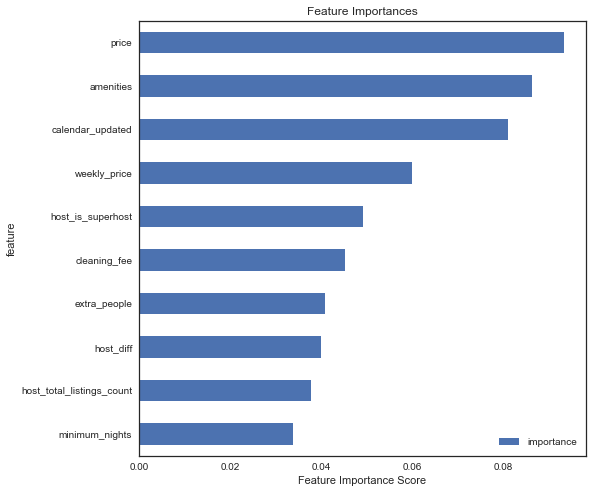

,importance
feature,
minimum_nights,0.033705
host_total_listings_count,0.037666
host_diff,0.039906
extra_people,0.040868
cleaning_fee,0.045093
host_is_superhost,0.049054
weekly_price,0.059819
calendar_updated,0.081045
amenities,0.086219


In [232]:
plot_feature_importances(dtr,X,Y)

So this looks more like a balanced model. The most important features are listed above.

#### Q3. Does our model scale to any city or do we need a specific model for each city?

Hypothesis:

We need to build a specif model for each city.

OR

Boston model score != General model score

AND

Seattle model score != General model score



In [234]:
Boston = df[df['city_seattle']==0]
Seattle = df[df['city_seattle']==1]

In [235]:
X_b = Boston.drop(columns=['review','city_seattle'])
Y_b = Boston['review']
X_s = Seattle.drop(columns=['review','city_seattle'])
Y_s = Seattle['review']

In [236]:
X_b_train, X_b_test, y_b_train, y_b_test = train_test_split(X_b, Y_b , test_size=.30, random_state=42)
X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, Y_s , test_size=.30, random_state=42)

I will not retrain model. Instead, I will use it on test data directly.

In [238]:
y_b_preds=dtr.predict(X_b_test)
score_1=r2_score(y_b_test, y_b_preds)
print(score_1)

0.9762285753842408


In [240]:
y_s_preds=dtr.predict(X_s_test)
score_2=r2_score(y_s_test, y_s_preds)
print(score_2)

0.9919294484049336


This is good result and shows that our model can be extended to new cities.

In [241]:
filename = './finalized_model.sav'
pickle.dump(dtr, open(filename, 'wb'))

In [244]:
with open("./airbnb_classifier.dot", "w") as f:
    f = tree.export_graphviz(dtr, out_file=f,max_depth=5)

You can turn the dot file to png or pdf file using below command:

dot -Tpng filename -o outputfile

The above code shows decission tree structure.

This looks good but it is better to test this model on another city to come up with the conclusion that this is a good model. So, I choose to test it against New York City Airbnb data.

We will do a quick clean up. Remove missing values, take columns we need. Let's just use calender because listing is huge.

### Deployment and Testing

We will deploy the model and test it on New York data. But if our assumption is that our model is general, we want to do the following:

1. Use the most important features. This is to deploy a fast model.

2. Remove host diff since it is asking for a variable found in listing which is a huge csv for New York for example

#### Retrain Model

In [323]:
X = df[['price','amenities','calendar_updated','weekly_price','host_is_superhost','cleaning_fee','extra_people','host_total_listings_count','minimum_nights']]
Y = df['review']

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)
dtr = tree.DecisionTreeRegressor(random_state=42)
dtr = dtr.fit(X_train, y_train)
y_preds=dtr.predict(X_test)
r2_dtr =  r2_score(y_test,y_preds)
print(r2_dtr)

0.9779093215039153


In [325]:
filename = './deploy_model.sav'
pickle.dump(dtr, open(filename, 'wb'))

We are still getting strong results with only the 10 important features. Let's develop several functions to test the model on any city.

#### Deployment

In [308]:
def count_list(x):
    return x.count(',')+1

In [300]:
def convert_relative_numerical(x):
    if('a week' in x):
        return 1
    elif('week' in x):
        return str.split(x)[0]
    elif ('month' in x):
        return int(str.split(x)[0])*4
    elif ('never' in x):
        return int(0)
    else:
        return int(1)

In [341]:
def clean_missing_airbnb(df):
    df['weekly_price'].fillna(inplace=True,value=0)
    df['price'].fillna(inplace=True,value=0)
    df['cleaning_fee'].fillna(inplace=True,value=0)
    df['extra_people'].fillna(inplace=True,value=0)
    df['review_scores_rating'].fillna(inplace=True,value=0)
    df['host_total_listings_count'].fillna(inplace=True,value=0)
    return df

In [347]:
def convert_data(df):
    df['price']=df['price'].replace('[$,]','',regex=True).astype(float).astype(int)
    df['amenities'] = df['amenities'].apply(lambda x: count_list(x))
    df['calendar_updated']=df['calendar_updated'].apply(lambda x:convert_relative_numerical(x))
    df['weekly_price']=df['weekly_price'].replace('[$,]','',regex=True).astype(float).astype(int)
    df['host_is_superhost']=df['host_is_superhost'].astype(bool)
    df['cleaning_fee']=df['cleaning_fee'].replace('[$,]','',regex=True).astype(float).astype(int)
    df['extra_people']=df['extra_people'].replace('[$,]','',regex=True).astype(float).astype(int)
    df['host_total_listings_count']=df['host_total_listings_count'].astype(int)
    df['minimum_nights']=df['minimum_nights'].astype(int)
    df['review'] = df['review_scores_rating'].astype(float)  
    return df

In [345]:
def split_airbnb(df):
    X = df[['price','amenities','calendar_updated','weekly_price','host_is_superhost','cleaning_fee','extra_people','host_total_listings_count','minimum_nights']]
    Y = df['review']
    return X,Y

In [357]:
def test_model(X,Y):
    dtr = pickle.load(open('./deploy_model.sav','rb'))
    y_preds=dtr.predict(X)
    r2Score =  r2_score(Y,y_preds)
    return r2Score

In [349]:
def deploy_model(filename):
    df = pd.read_csv(filename)
    df = clean_missing_airbnb(df)
    df = convert_data(df)
    X,Y = split_airbnb(df)
    r2Score = test_model(X,Y)
    return r2Score

#### Testing

We test our model on San Franscisco data. A city similar to Boston and Seattle.

In [358]:
r2Score = deploy_model('./listings.csv')

In [359]:
print(r2Score)

-0.9038630511719585


We get a bad score for SF. Let's edit our function to retrain data with only the 10 variables and decision tree regressor.

In [360]:
def test_model(X,Y,dtr):
    y_preds=dtr.predict(X)
    r2Score =  r2_score(Y,y_preds)
    return r2Score

In [363]:
def deploy_model(filename):
    df = pd.read_csv(filename)
    df = clean_missing_airbnb(df)
    df = convert_data(df)
    X,Y = split_airbnb(df)
    X_train, X_test, y_train, y_test = train_test_split(X, Y , test_size=.30, random_state=42)
    dtr = tree.DecisionTreeRegressor(random_state=42)
    dtr = dtr.fit(X_train, y_train)
    r2Score = test_model(X,Y,dtr)
    return r2Score

In [364]:
r2Score = deploy_model('./listings.csv')
print(r2Score)

0.6089067696946826


This is not impressive, let is do one more test to NY.

In [365]:
r2Score = deploy_model('./airbnb-open-data-in-nyc/listings_detail.csv')

/Users/Heizenberg/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [366]:
print(r2Score)

0.5170667678706731


So, the answer for the third question is that no, we cannot generalize our model to predict other city scores. Our model is specific to Boston and Seattle. Methods to improve this model would be:

1. Do thourough analysis by merging NY and SF data to Boston and Seattle

2. Deploy this model on a hadoop cluster that scrap data for all cities and create a more accurate model

3. Test results of SF and NY when doing linear regression to their variables